# Step-1: Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step-2: Define Model/Network

In [2]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        
    def forward(self, x):
        print(f" Input to First Hidden Layer = {x.shape}")
        x = F.relu(self.fc1(x))
        print(f" After First Hidden Layer = {x.shape}")
        x = F.relu(self.fc2(x))
        print(f" After Second Hidden Layer = {x.shape}")
        x = self.fc3(x)
        print(f" After Output Layer = {x.shape}")
        return x

# Step-3: Generate Synthetic Data

In [3]:
np.random.seed(24)
torch.manual_seed(24)

X = np.random.rand(100, 10).astype(np.float32)
y = np.random.rand(100, 1).astype(np.float32)

X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Step-4: Create DataLoader for Training

In [4]:
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Step-5: Initialize the Model, Loss Function and Optimizer

In [5]:
model = ANN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Step-6: Train the Model

In [6]:
epochs = 1
losses = []
batch = 0

# Print dimensions of weights for each layer
print("Layer Weight Dimensions:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")
        
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        
        print(f"*******Processing Batch [{batch+1}]  ***********")
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
                
        print(f"*******Batch [{batch+1}] Processed... *********** \n")
        batch = batch + 1
    losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}]. Loss: {loss.item():.4f}")

Layer Weight Dimensions:
fc1.weight: torch.Size([32, 10])
fc1.bias: torch.Size([32])
fc2.weight: torch.Size([16, 32])
fc2.bias: torch.Size([16])
fc3.weight: torch.Size([1, 16])
fc3.bias: torch.Size([1])
*******Processing Batch [1]  ***********
 Input to First Hidden Layer = torch.Size([16, 10])
 After First Hidden Layer = torch.Size([16, 32])
 After Second Hidden Layer = torch.Size([16, 16])
 After Output Layer = torch.Size([16, 1])
*******Batch [1] Processed... *********** 

*******Processing Batch [2]  ***********
 Input to First Hidden Layer = torch.Size([16, 10])
 After First Hidden Layer = torch.Size([16, 32])
 After Second Hidden Layer = torch.Size([16, 16])
 After Output Layer = torch.Size([16, 1])
*******Batch [2] Processed... *********** 

*******Processing Batch [3]  ***********
 Input to First Hidden Layer = torch.Size([16, 10])
 After First Hidden Layer = torch.Size([16, 32])
 After Second Hidden Layer = torch.Size([16, 16])
 After Output Layer = torch.Size([16, 1])
*******

[NVSHARE][WARN]: Couldn't open file /var/run/secrets/kubernetes.io/serviceaccount/namespace to read Pod namespace
[NVSHARE][INFO]: Successfully initialized nvshare GPU
[NVSHARE][INFO]: Client ID = 66e622a1c32f9b1c


# Step-7: Visualize the Training Loss

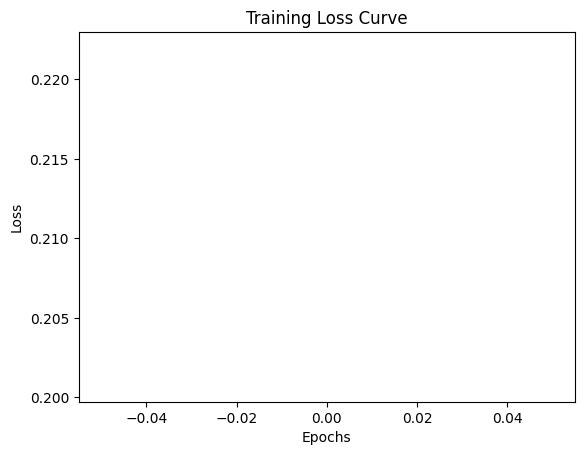

In [7]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()